In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [8]:
df=pd.read_csv("C://Data_science projects/Kaggle/Resources/student1.csv")

In [9]:
df.shape

(10000, 6)

## Exploratory Data Analysis

In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## Finding Null Values

In [17]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## Finding Duplicates

In [21]:
df.duplicated().sum()

127

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

## Checking and Reviewing DataFrame Information

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


## Checking The General Correlation Between All Columns And Their Relationships

In [32]:
corr=df.select_dtypes(exclude='object').corr()

In [33]:
corr

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


## Visualization Overview Of Relationships In The Dataset

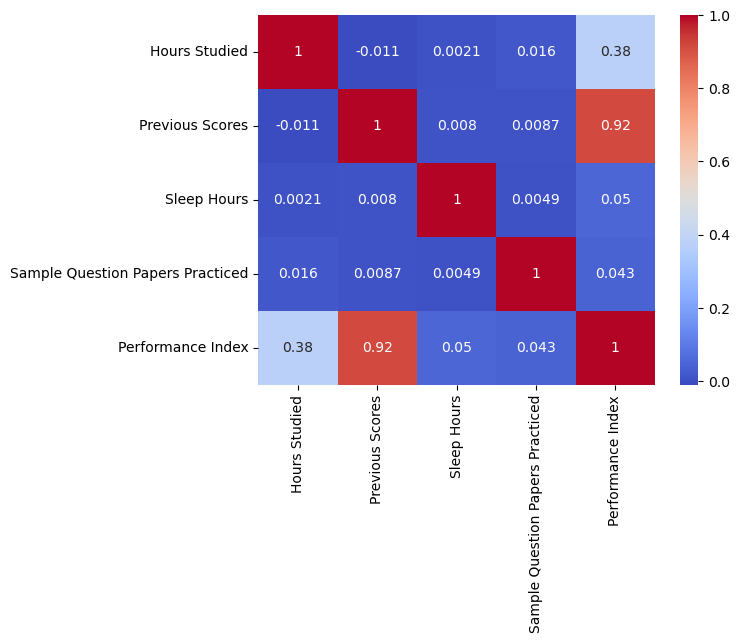

<Figure size 600x300 with 0 Axes>

In [42]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.figure(figsize=(6,3))
plt.show()

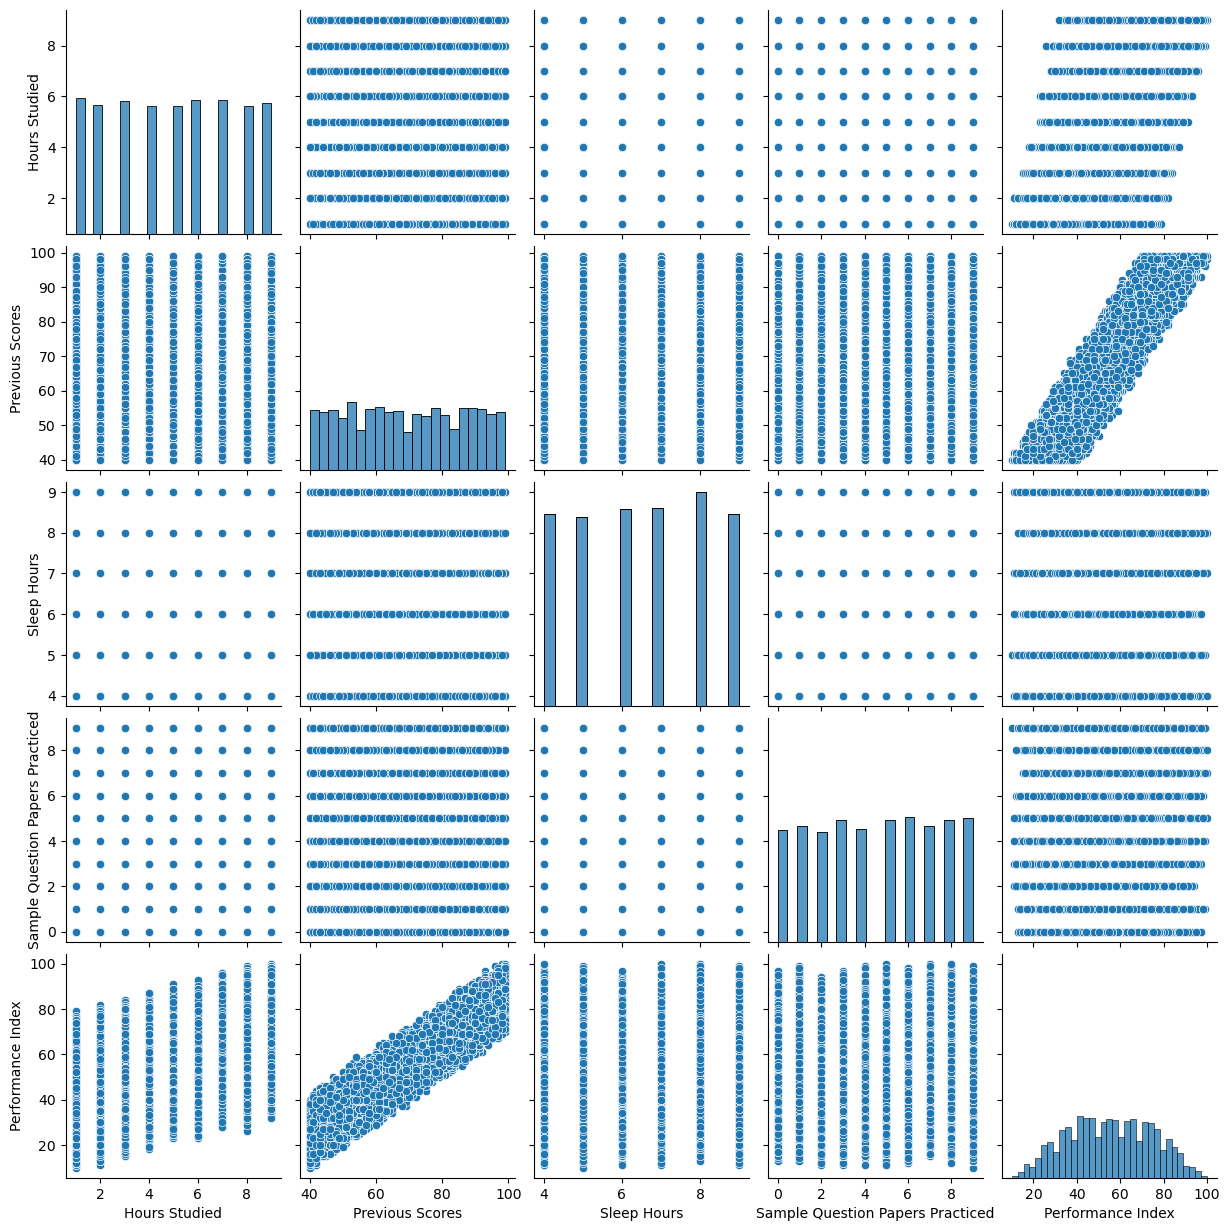

In [43]:
#Visualization overview of Relationships in the Dataset
sns.pairplot(df)
plt.show()

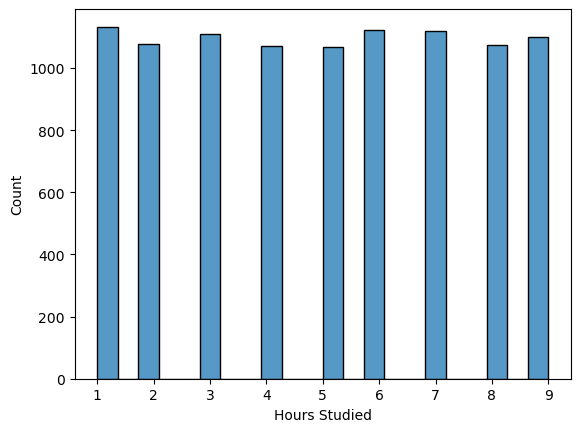

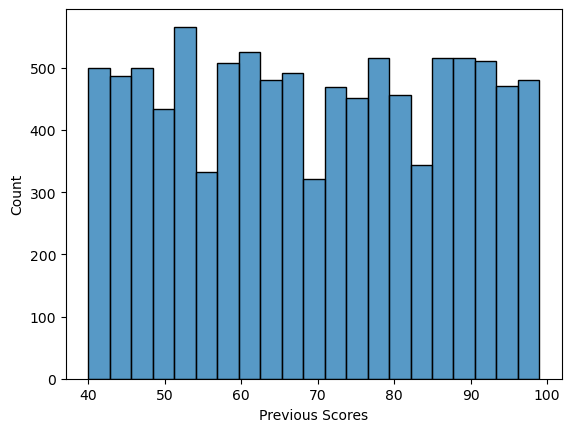

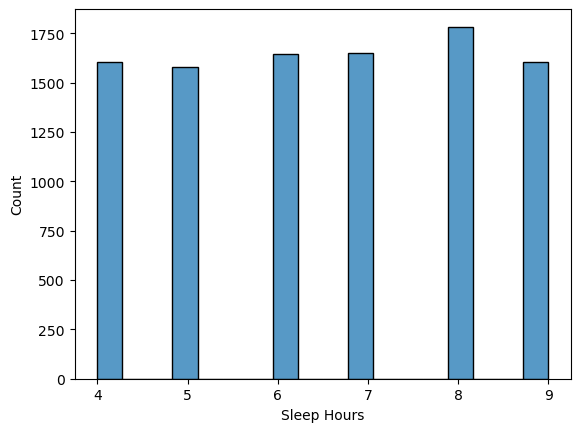

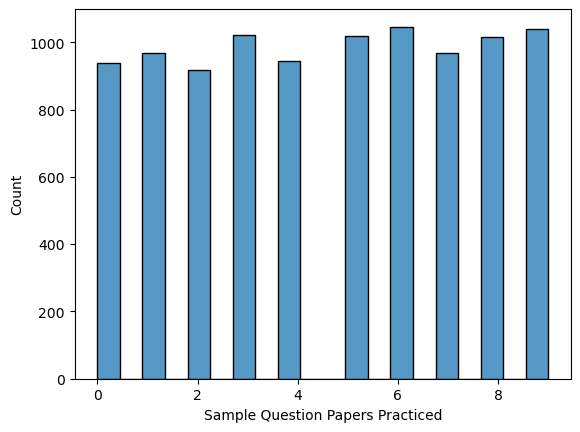

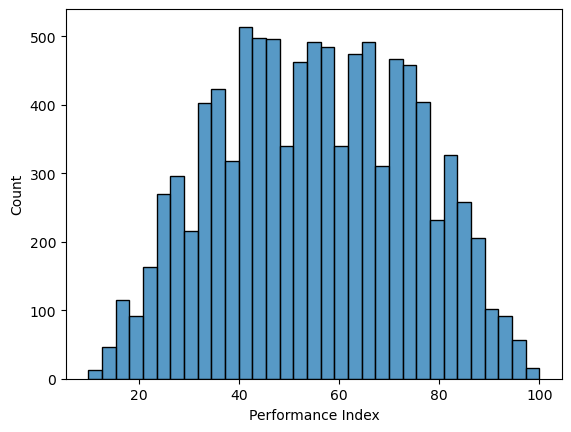

In [48]:
for i in (df.select_dtypes(exclude='object')):
    sns.histplot(data=df,x=i)
    plt.show()


## Finding Outliers

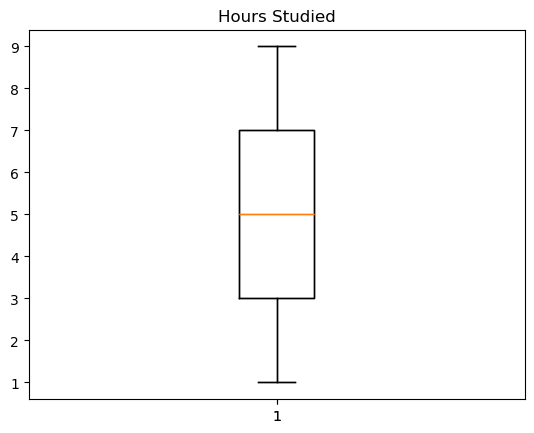

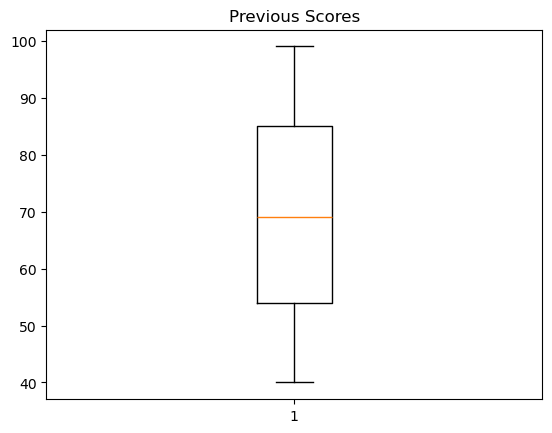

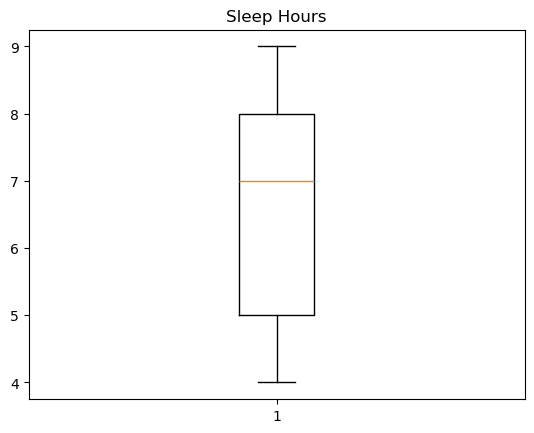

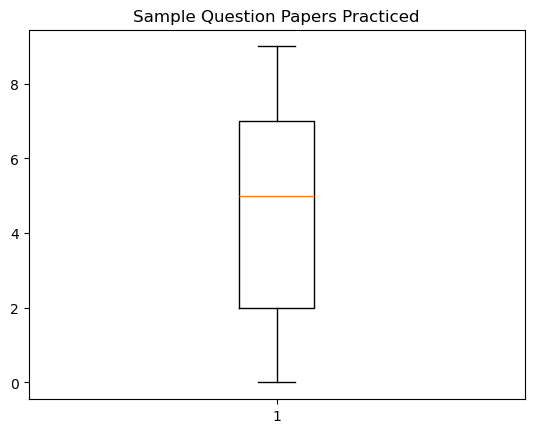

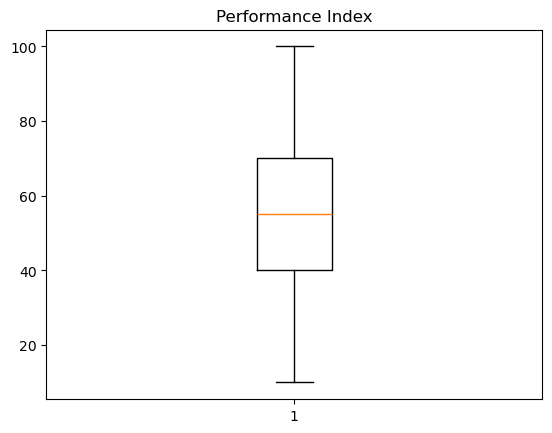

In [50]:
for i in (df.select_dtypes(exclude='object')):
    plt.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [51]:
num = df.select_dtypes(exclude='object')

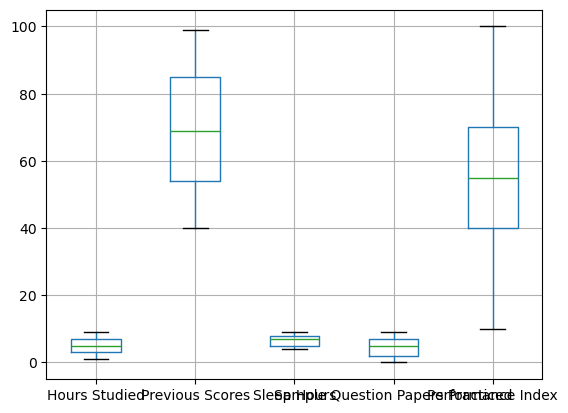

In [52]:
num.boxplot()
plt.show()

In [53]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [54]:
num.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


## Encoding

In [60]:
df.replace({'Yes':1,'No':0},inplace=True)

In [61]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [62]:
X=df.drop('Performance Index', axis=1)
Y=df['Performance Index']
print(X.head())
print(Y.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  
0                                 1  
1                                 2  
2                                 2  
3                                 2  
4                                 5  
0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64


## Split The Data

In [63]:
from sklearn.model_selection import train_test_split 

In [66]:
X_train,X_test,Y_train,Y_test,= train_test_split(X,Y,test_size=0.2,random_state=9)

In [67]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7898, 5) (7898,)
(1975, 5) (1975,)


## Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [74]:
cols=['Hours Studied','Previous Scores'	,
      'Sleep Hours','Sample Question Papers Practiced']
cols

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced']

In [77]:
scaler=StandardScaler()
X_train[cols]= scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [78]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
961,1.157941,1.013220,1,-1.492041,-0.905306
4570,-0.388722,1.703976,0,-0.315039,1.186796
9625,1.544606,0.840531,0,1.450462,1.535480
8066,-0.002056,0.149775,0,-0.903540,0.838112
5775,-1.162053,0.495153,1,0.861962,-0.207939
...,...,...,...,...,...
6248,-0.775388,-1.692242,0,-1.492041,-1.253990
501,0.384609,1.243472,1,-1.492041,-1.602673
6841,-1.162053,1.070783,1,0.861962,0.140745
4469,-1.162053,-1.519553,1,-1.492041,0.140745


In [79]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
3195,0.408111,0.314428,0,0.285660,1.212171
2543,1.562316,-0.269269,1,0.285660,0.513590
4101,1.562316,1.423451,1,-0.305722,1.561461
1222,-1.130828,0.256058,0,-0.897103,-1.232863
6249,-1.130828,0.489537,1,-0.305722,-0.534282
...,...,...,...,...,...
3364,1.562316,0.197688,1,-1.488485,0.513590
1638,-1.130828,1.540190,0,-0.897103,0.164299
9540,0.408111,-0.444378,1,0.877041,-1.582153
2125,-0.361359,1.598560,0,0.285660,0.862880


## Model Building

In [82]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()
alg = model.fit(X_train,Y_train)

## Make Predictions

In [84]:
alg.predict(X_train)

array([80.22848032, 82.58898753, 83.20029965, ..., 66.68546453,
       18.93935325, 82.58939617])

In [85]:
alg.predict(X_test)

array([64.38979239, 62.77988475, 92.81510756, ..., 50.49989312,
       81.23910909, 40.02732193])

## Performance Evaluation

In [86]:
#train

In [87]:
metrics.mean_squared_error(Y_train,alg.predict(X_train))

4.164618488331783

In [88]:
metrics.r2_score(Y_train,alg.predict(X_train))

0.9887287307569751

In [89]:
#Test

In [90]:
metrics.mean_squared_error(Y_test,alg.predict(X_test))

4.27662819540888

In [91]:
metrics.r2_score(Y_test,alg.predict(X_test))

0.9883375345920165